In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c induction-task


Saving kaggle.json to kaggle.json
 99% 199M/201M [00:07<00:00, 41.1MB/s]
100% 201M/201M [00:07<00:00, 26.4MB/s]


In [2]:
!unzip induction-task.zip

Archive:  induction-task.zip
  inflating: Data/Test/image_1.jpg   
  inflating: Data/Test/image_10.jpg  
  inflating: Data/Test/image_100.jpg  
  inflating: Data/Test/image_101.jpg  
  inflating: Data/Test/image_102.jpg  
  inflating: Data/Test/image_103.jpg  
  inflating: Data/Test/image_104.jpg  
  inflating: Data/Test/image_105.jpg  
  inflating: Data/Test/image_106.jpg  
  inflating: Data/Test/image_107.jpg  
  inflating: Data/Test/image_108.jpg  
  inflating: Data/Test/image_109.jpg  
  inflating: Data/Test/image_11.jpg  
  inflating: Data/Test/image_110.jpg  
  inflating: Data/Test/image_111.jpg  
  inflating: Data/Test/image_112.jpg  
  inflating: Data/Test/image_113.jpg  
  inflating: Data/Test/image_114.jpg  
  inflating: Data/Test/image_115.jpg  
  inflating: Data/Test/image_116.jpg  
  inflating: Data/Test/image_117.jpg  
  inflating: Data/Test/image_118.jpg  
  inflating: Data/Test/image_119.jpg  
  inflating: Data/Test/image_12.jpg  
  inflating: Data/Test/image_120.jpg  


In [3]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00


In [4]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.applications import MobileNetV2, ResNet152, VGG16, EfficientNetB0, InceptionV3
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.regularizers import l2
import os
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, target_size=(236, 236))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(features.shape[0], 236, 236, 3)
    return features

TRAIN_DIR = "/content/Data/Train"

train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

train_features = extract_features(train['image'])

x_train = train_features / 255.0

le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_train = to_categorical(y_train, num_classes=2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()


model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(236, 236, 3),
                 kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), batch_size=16, epochs=10)

AI completed
Real completed


  0%|          | 0/801 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.7186 - loss: 5.3357 - val_accuracy: 0.9193 - val_loss: 2.1269
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9565 - loss: 1.7936 - val_accuracy: 0.9752 - val_loss: 1.3541
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9717 - loss: 1.2467 - val_accuracy: 0.9565 - val_loss: 0.9958
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9784 - loss: 0.9039 - val_accuracy: 0.9627 - val_loss: 0.9178
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9850 - loss: 0.8352 - val_accuracy: 0.9752 - val_loss: 0.7735
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9831 - loss: 0.6901 - val_accuracy: 0.9814 - val_loss: 0.5950
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9875 - loss: 0.5848 - val_accuracy: 0.9689 - val_loss: 0.5626
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9916 - loss: 0.5073 - val_accuracy: 0.9441 - 

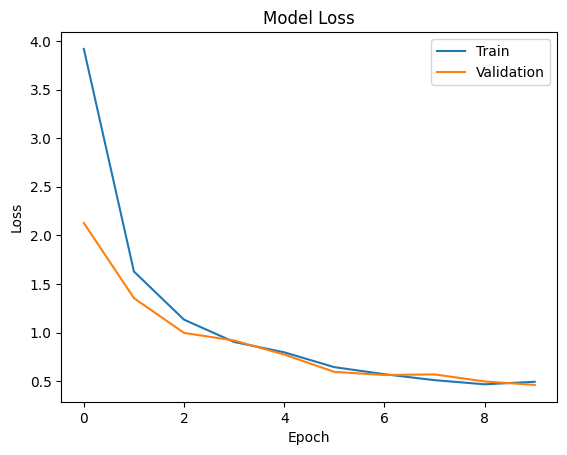

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [13]:
#delete image_62

In [17]:
import shutil

dir_to_remove = "/content/Data/Test/.ipynb_checkpoints"

try:
    shutil.rmtree(dir_to_remove)
    print(f"Directory '{dir_to_remove}' and its contents removed successfully.")
except FileNotFoundError:
    print(f"Directory '{dir_to_remove}' not found.")
except OSError as e:
    print(f"Error removing directory '{dir_to_remove}': {e}")

Directory '/content/Data/Test/.ipynb_checkpoints' and its contents removed successfully.


In [18]:
TEST_DIR = "/content/Data/Test"

def create_test_dataframe(dir):
    image_paths = []
    for imagename in os.listdir(dir):
        image_paths.append(os.path.join(dir, imagename))
    return image_paths

def extract_features_test(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, target_size=(236, 236))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 236, 236, 3)
    return features

test = pd.DataFrame()
test['image'] = create_test_dataframe(TEST_DIR)
test_features = extract_features_test(test['image'])
x_test = test_features / 255.0

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = le.inverse_transform(predicted_labels)

image_ids = [img.split('/')[-1] for img in test['image']]

results = pd.DataFrame({'Id': image_ids, 'Label': predicted_labels})
results.to_csv('submission.csv', index=False)

  0%|          | 0/199 [00:00<?, ?it/s]

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


In [8]:
model.save('my_model.h5')

from google.colab import files
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
!kaggle competitions download -c induction-task-2025


100% 80.9M/80.9M [00:03<00:00, 31.7MB/s]
100% 80.9M/80.9M [00:03<00:00, 23.1MB/s]


In [10]:
!unzip -o induction-task-2025.zip

Archive:  induction-task-2025.zip
  inflating: Test_Images/image_0.jpg  
  inflating: Test_Images/image_1.jpg  
  inflating: Test_Images/image_10.jpg  
  inflating: Test_Images/image_100.jpg  
  inflating: Test_Images/image_101.jpg  
  inflating: Test_Images/image_102.jpg  
  inflating: Test_Images/image_103.jpg  
  inflating: Test_Images/image_104.jpg  
  inflating: Test_Images/image_105.jpg  
  inflating: Test_Images/image_106.jpg  
  inflating: Test_Images/image_107.jpg  
  inflating: Test_Images/image_108.jpg  
  inflating: Test_Images/image_109.jpg  
  inflating: Test_Images/image_11.jpg  
  inflating: Test_Images/image_110.jpg  
  inflating: Test_Images/image_111.jpg  
  inflating: Test_Images/image_112.jpg  
  inflating: Test_Images/image_113.jpg  
  inflating: Test_Images/image_114.jpg  
  inflating: Test_Images/image_115.jpg  
  inflating: Test_Images/image_116.jpg  
  inflating: Test_Images/image_117.jpg  
  inflating: Test_Images/image_118.jpg  
  inflating: Test_Images/imag

In [11]:
TEST_DIR = "/content/Test_Images"

test = pd.DataFrame()
test['image'] = create_test_dataframe(TEST_DIR)
test_features = extract_features_test(test['image'])
x_test = test_features / 255.0

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = le.inverse_transform(predicted_labels)

image_ids = [img.split('/')[-1] for img in test['image']]

results = pd.DataFrame({'Id': image_ids, 'Label': predicted_labels})
results.to_csv('submission_2ndcompetition.csv', index=False)

  0%|          | 0/200 [00:00<?, ?it/s]

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step
